<b>Target :</b> To build the basic skeletion ensuring 1. receptive field close to image size i.e 28 2. Parameters < 8k 3. Correct placement of max pooling to get edges,gradients and textures,patterns<br>
<b>Results :</b> The final model architecture is C->C->T->C->C->T->C->1x1->GAP with number of channels = 16 across all layers<br>
<b>Analysis :</b> While there isnt such a huge gap between train and test accuracies, there is scope for learning. And since I cannot increase the parameters by a lot, I went for Batch Normalization next to make the model train harder

# Import Libraries

In [1]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

## Data Transformations


In [2]:
# Train Phase transformations
train_transforms = transforms.Compose([
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.1307,), (0.3081,))
                                       ])

# Test Phase transformations
test_transforms = transforms.Compose([
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.1307,), (0.3081,))
                                       ])


# Dataset and Creating Train/Test Split

In [3]:
train = datasets.MNIST('./data', train=True, download=True, transform=train_transforms)
test = datasets.MNIST('./data', train=False, download=True, transform=test_transforms)

# Dataloader Arguments & Test/Train Dataloaders


In [4]:
SEED = 1

# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

# For reproducibility
torch.manual_seed(SEED)

if cuda:
    torch.cuda.manual_seed(SEED)

# dataloader arguments
dataloader_args = dict(shuffle=True, batch_size=128, num_workers=4, pin_memory=True) if cuda else dict(shuffle=True, batch_size=64)

# train dataloader
train_loader = torch.utils.data.DataLoader(train, **dataloader_args)

# test dataloader
test_loader = torch.utils.data.DataLoader(test, **dataloader_args)

CUDA Available? True


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


# View sample images

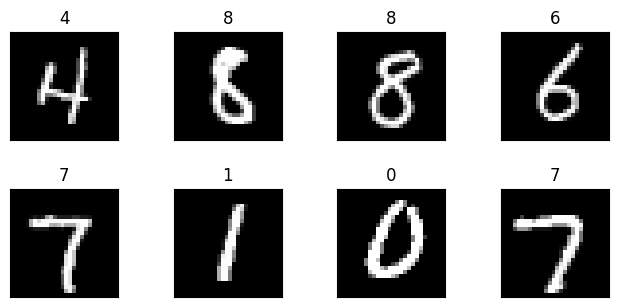

In [5]:
from utils import return_dataset_images

return_dataset_images(train_loader, 8)

# Model Params

In [6]:
from model_1 import Net, model_summary, model_train, model_test

use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = Net().to(device)
model_summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 26, 26]             144
              ReLU-2           [-1, 16, 26, 26]               0
            Conv2d-3           [-1, 16, 24, 24]           2,304
              ReLU-4           [-1, 16, 24, 24]               0
            Conv2d-5            [-1, 8, 24, 24]             128
         MaxPool2d-6            [-1, 8, 12, 12]               0
            Conv2d-7           [-1, 16, 10, 10]           1,152
              ReLU-8           [-1, 16, 10, 10]               0
            Conv2d-9             [-1, 16, 8, 8]           2,304
             ReLU-10             [-1, 16, 8, 8]               0
           Conv2d-11              [-1, 8, 8, 8]             128
        MaxPool2d-12              [-1, 8, 4, 4]               0
           Conv2d-13             [-1, 16, 4, 4]           1,152
             ReLU-14             [-1, 1

# Training and Testing

In [7]:
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
criterion = F.nll_loss
num_epochs = 15

for epoch in range(1, num_epochs+1):
    print(f'Epoch {epoch}')
    model_train(model, device, train_loader, optimizer, criterion)
    model_test(model, device, test_loader, criterion)

Epoch 1


Train: Loss=2.2959 Batch_id=468 Accuracy=11.05: 100%|██████████| 469/469 [00:17<00:00, 27.51it/s]


Test set: Average loss: 2.2944, Accuracy: 1780/10000 (17.80%)

Epoch 2


Train: Loss=0.2148 Batch_id=468 Accuracy=62.90: 100%|██████████| 469/469 [00:16<00:00, 28.04it/s]


Test set: Average loss: 0.2088, Accuracy: 9375/10000 (93.75%)

Epoch 3


Train: Loss=0.2769 Batch_id=468 Accuracy=94.25: 100%|██████████| 469/469 [00:17<00:00, 26.82it/s]


Test set: Average loss: 0.1213, Accuracy: 9617/10000 (96.17%)

Epoch 4


Train: Loss=0.1061 Batch_id=468 Accuracy=96.13: 100%|██████████| 469/469 [00:16<00:00, 27.81it/s]


Test set: Average loss: 0.1019, Accuracy: 9684/10000 (96.84%)

Epoch 5


Train: Loss=0.0434 Batch_id=468 Accuracy=96.84: 100%|██████████| 469/469 [00:17<00:00, 27.09it/s]


Test set: Average loss: 0.1066, Accuracy: 9650/10000 (96.50%)

Epoch 6


Train: Loss=0.1278 Batch_id=468 Accuracy=97.33: 100%|██████████| 469/469 [00:16<00:00, 28.47it/s]


Test set: Average loss: 0.0701, Accuracy: 9784/10000 (97.84%)

Epoch 7


Train: Loss=0.0765 Batch_id=468 Accuracy=97.60: 100%|██████████| 469/469 [00:17<00:00, 26.48it/s]


Test set: Average loss: 0.0718, Accuracy: 9761/10000 (97.61%)

Epoch 8


Train: Loss=0.0408 Batch_id=468 Accuracy=97.71: 100%|██████████| 469/469 [00:16<00:00, 28.82it/s]


Test set: Average loss: 0.0573, Accuracy: 9817/10000 (98.17%)

Epoch 9


Train: Loss=0.0175 Batch_id=468 Accuracy=97.96: 100%|██████████| 469/469 [00:17<00:00, 26.65it/s]


Test set: Average loss: 0.0584, Accuracy: 9815/10000 (98.15%)

Epoch 10


Train: Loss=0.0600 Batch_id=468 Accuracy=98.17: 100%|██████████| 469/469 [00:16<00:00, 28.79it/s]


Test set: Average loss: 0.0524, Accuracy: 9830/10000 (98.30%)

Epoch 11


Train: Loss=0.0623 Batch_id=468 Accuracy=98.13: 100%|██████████| 469/469 [00:16<00:00, 27.89it/s]


Test set: Average loss: 0.0527, Accuracy: 9834/10000 (98.34%)

Epoch 12


Train: Loss=0.0803 Batch_id=468 Accuracy=98.29: 100%|██████████| 469/469 [00:16<00:00, 28.85it/s]


Test set: Average loss: 0.0518, Accuracy: 9836/10000 (98.36%)

Epoch 13


Train: Loss=0.0157 Batch_id=468 Accuracy=98.42: 100%|██████████| 469/469 [00:16<00:00, 28.81it/s]


Test set: Average loss: 0.0496, Accuracy: 9840/10000 (98.40%)

Epoch 14


Train: Loss=0.0233 Batch_id=468 Accuracy=98.47: 100%|██████████| 469/469 [00:16<00:00, 28.62it/s]


Test set: Average loss: 0.0468, Accuracy: 9836/10000 (98.36%)

Epoch 15


Train: Loss=0.0173 Batch_id=468 Accuracy=98.54: 100%|██████████| 469/469 [00:16<00:00, 28.70it/s]


Test set: Average loss: 0.0450, Accuracy: 9853/10000 (98.53%)



# Graphs

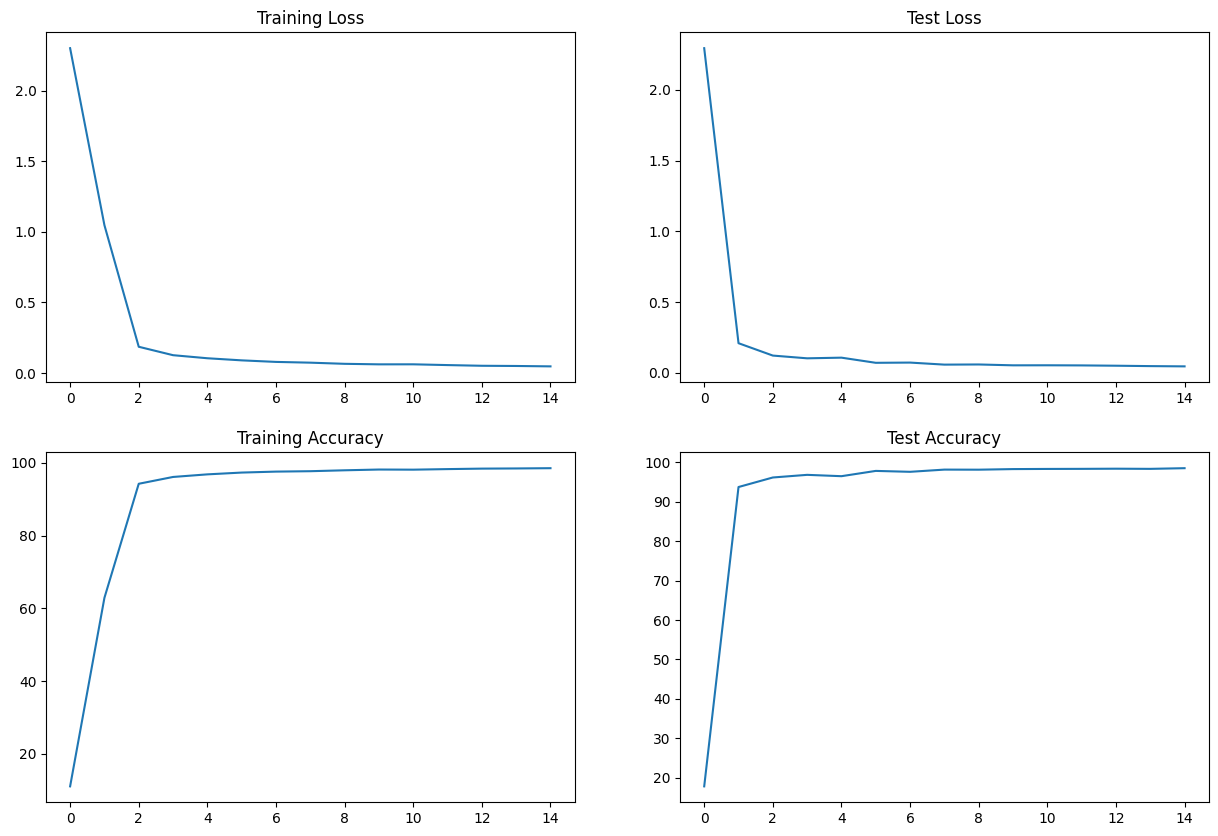

In [8]:
from model_1 import draw_graphs

draw_graphs()